In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [35]:
!pip install shap

In [2]:
train_data = pd.read_csv('LTV.csv')
train_data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
X = train_data.drop('Gender', axis = 1)
y = train_data['Gender']

In [4]:
X.dtypes.to_dict()

{'Customer': dtype('O'),
 'State': dtype('O'),
 'Customer Lifetime Value': dtype('float64'),
 'Response': dtype('O'),
 'Coverage': dtype('O'),
 'Education': dtype('O'),
 'Effective To Date': dtype('O'),
 'EmploymentStatus': dtype('O'),
 'Income': dtype('int64'),
 'Location Code': dtype('O'),
 'Marital Status': dtype('O'),
 'Monthly Premium Auto': dtype('int64'),
 'Months Since Last Claim': dtype('int64'),
 'Months Since Policy Inception': dtype('int64'),
 'Number of Open Complaints': dtype('int64'),
 'Number of Policies': dtype('int64'),
 'Policy Type': dtype('O'),
 'Policy': dtype('O'),
 'Renew Offer Type': dtype('O'),
 'Sales Channel': dtype('O'),
 'Total Claim Amount': dtype('float64'),
 'Vehicle Class': dtype('O'),
 'Vehicle Size': dtype('O')}

In [5]:
num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col, types in cols_and_type.items():
    if types in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)
        
print(num_cols)

['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [16]:
num_cols

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [17]:
str_cols

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [6]:
train_data[num_cols].describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


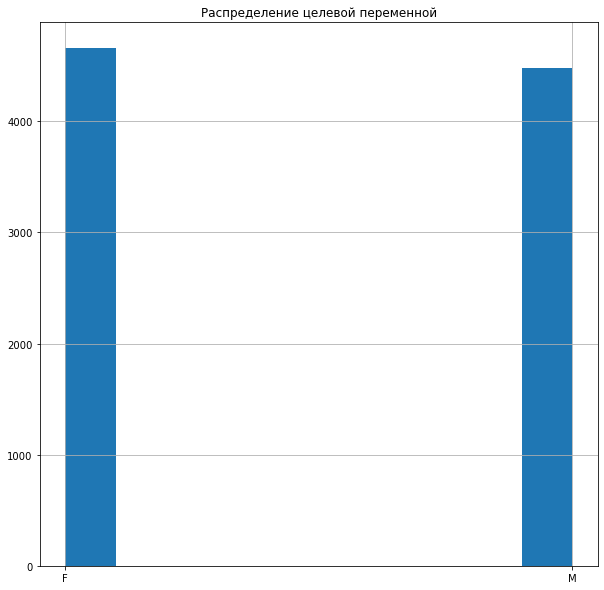

In [7]:
plt.figure(figsize = (10, 10))
plt.title('Распределение целевой переменной')
train_data['Gender'].hist()
plt.show()

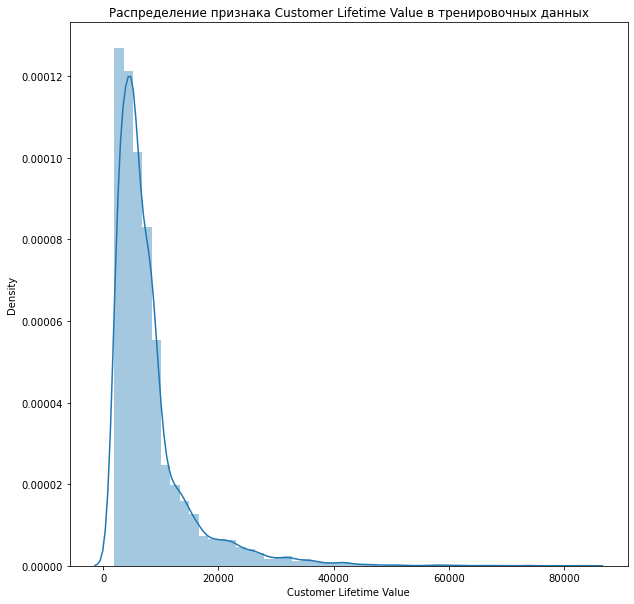

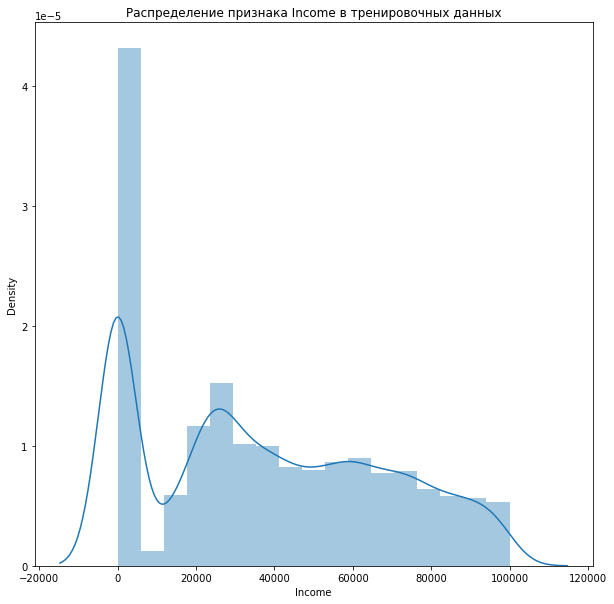

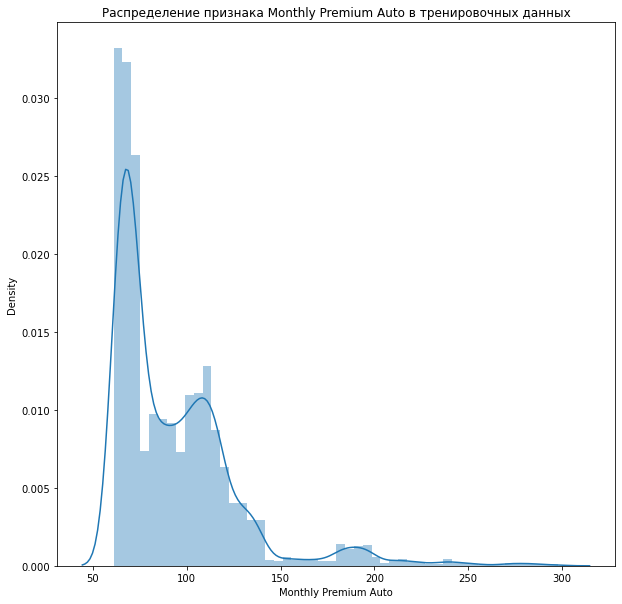

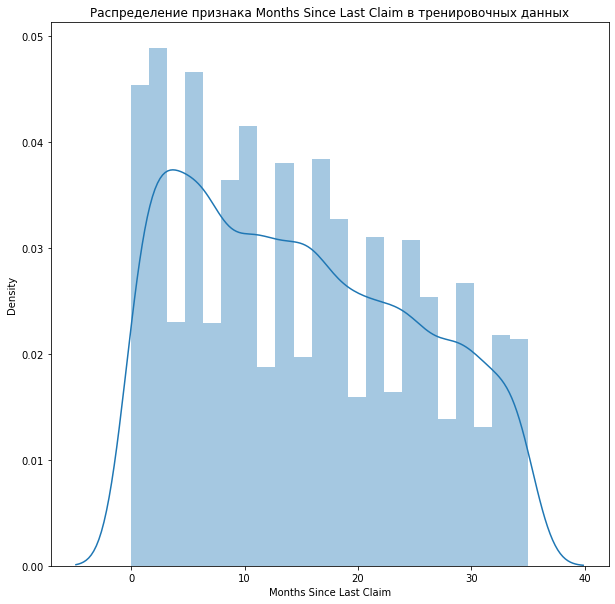

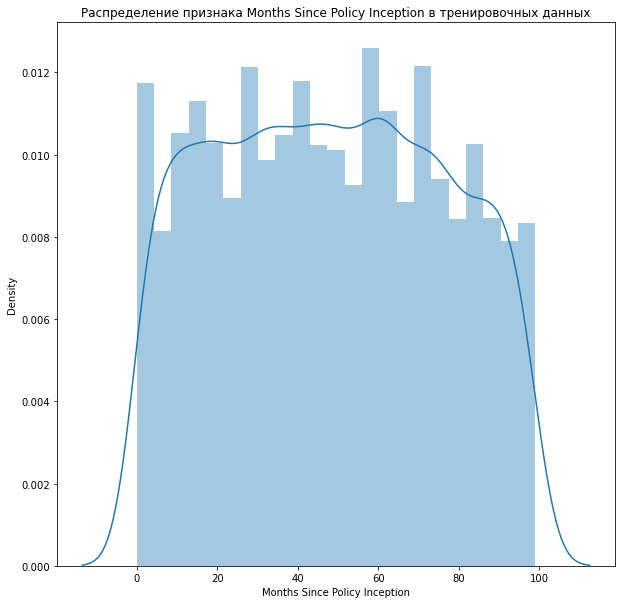

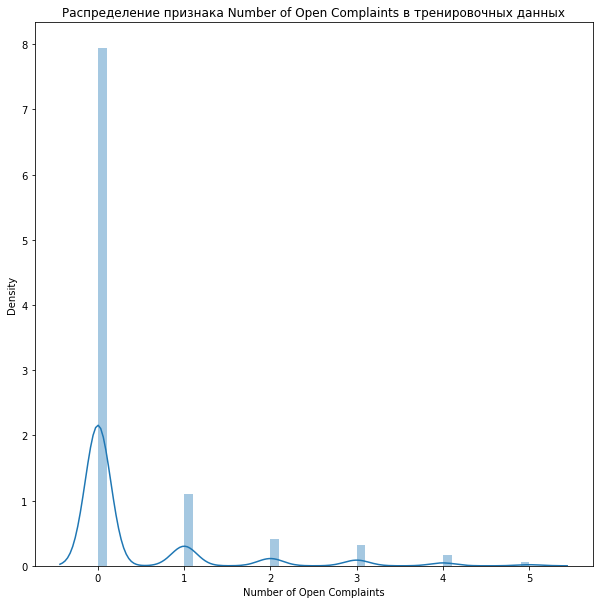

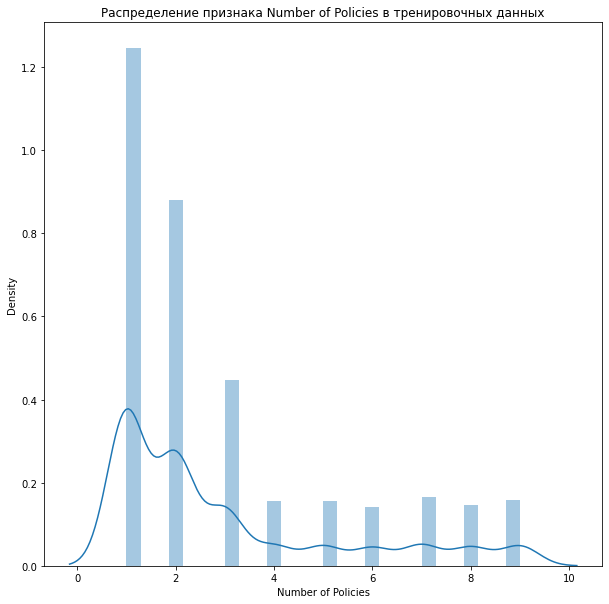

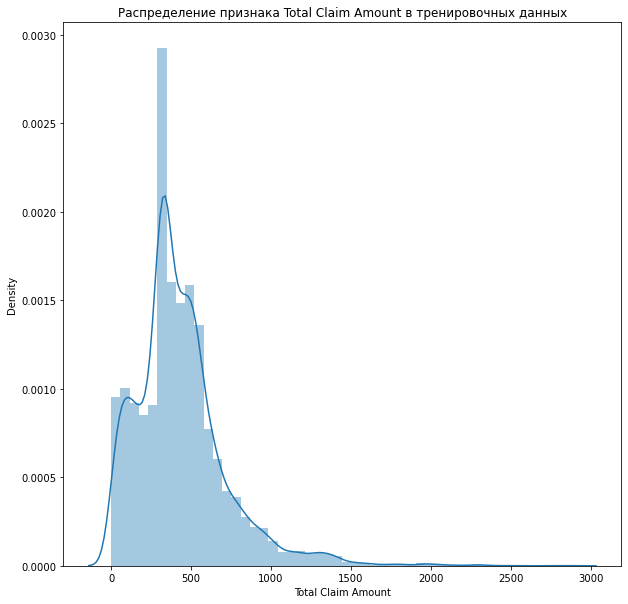

In [8]:
for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(train_data[col])

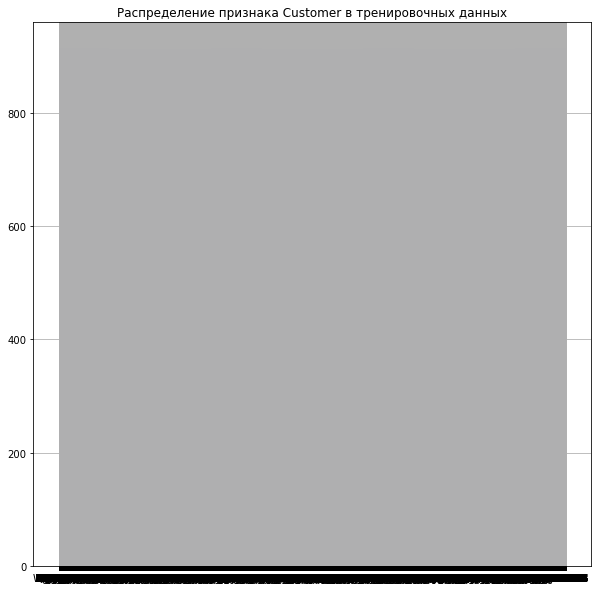

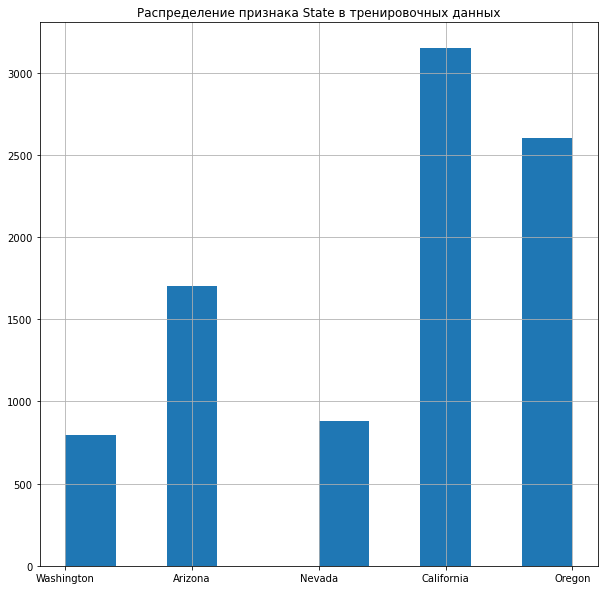

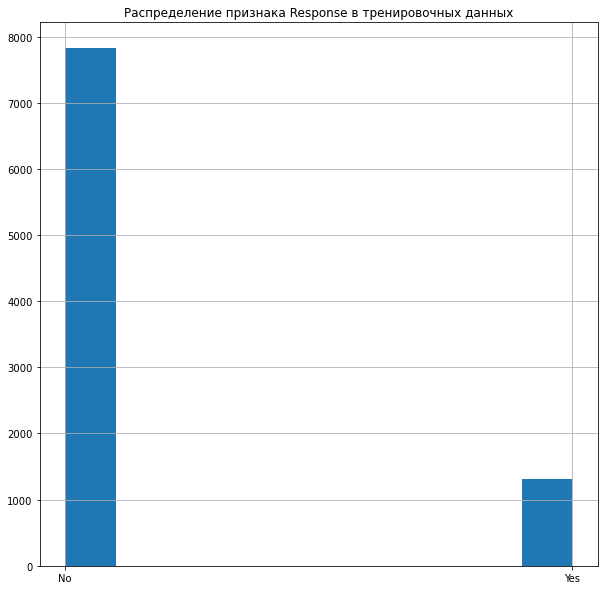

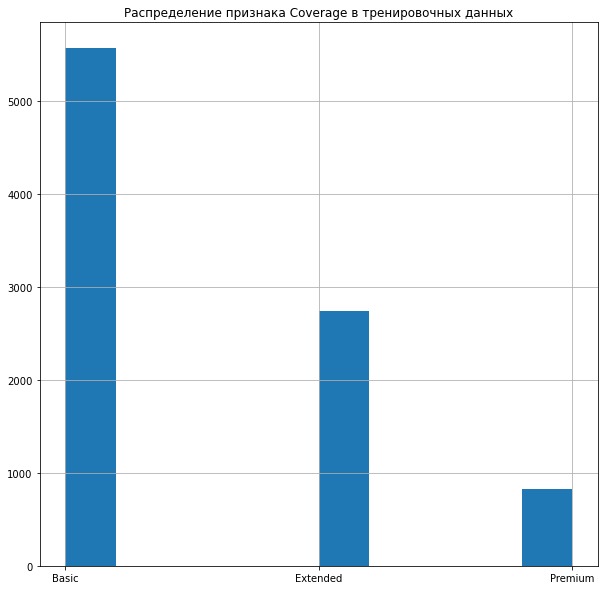

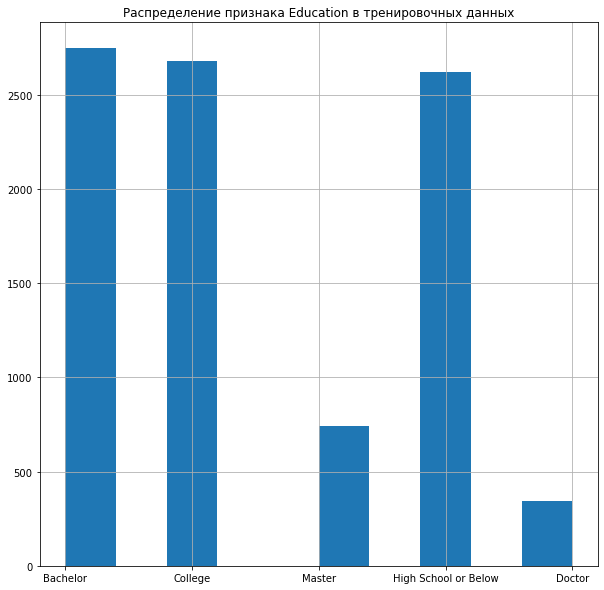

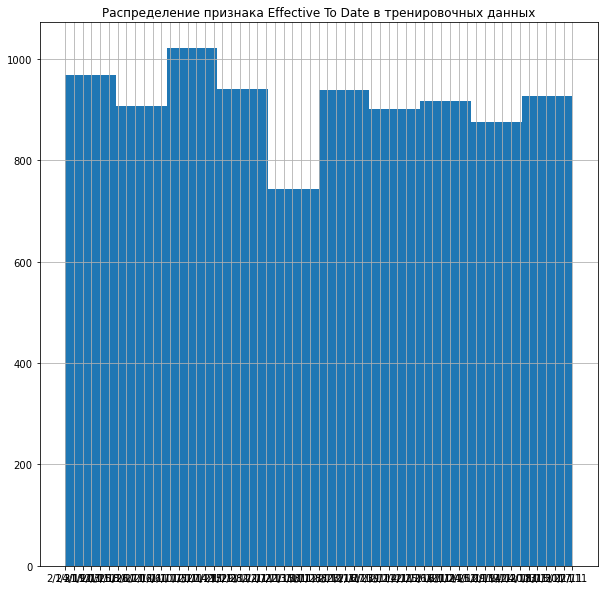

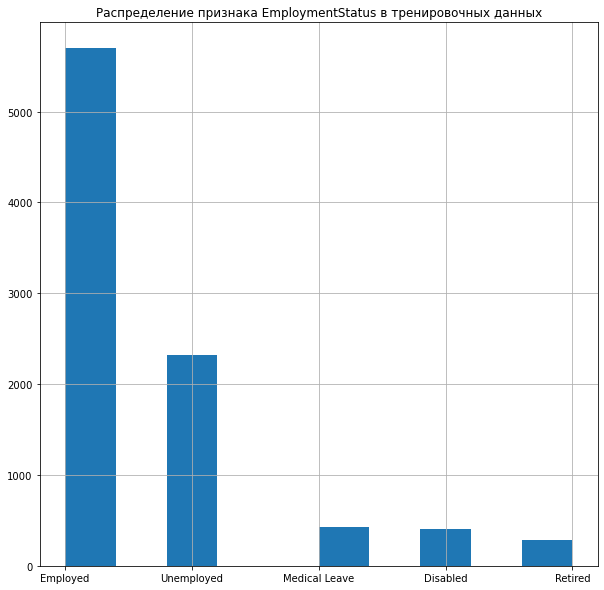

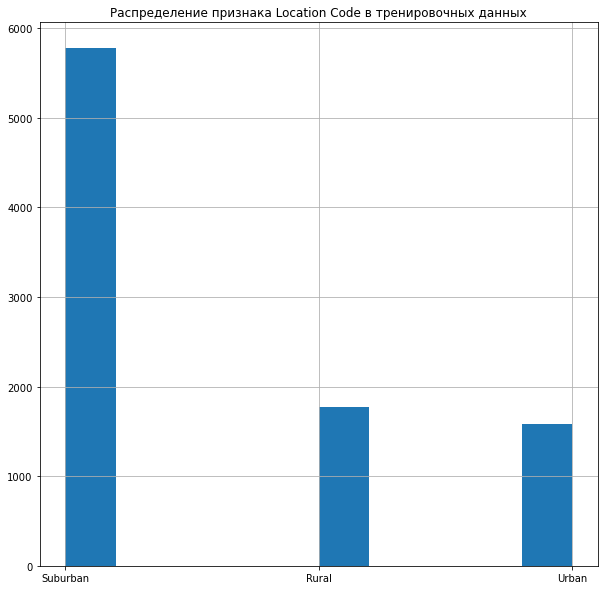

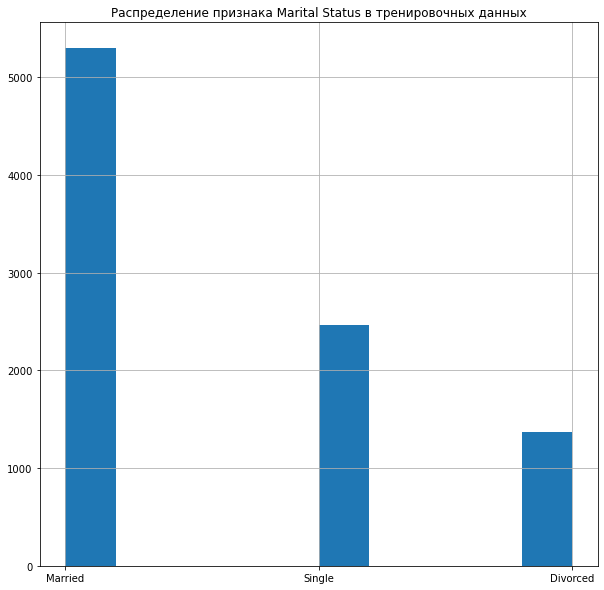

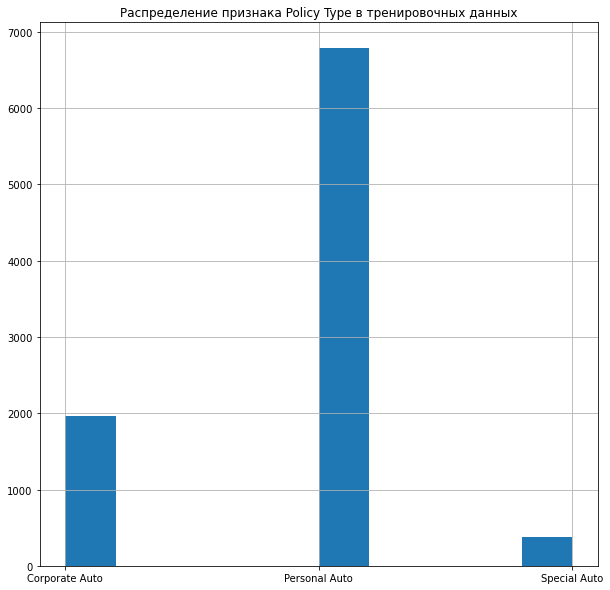

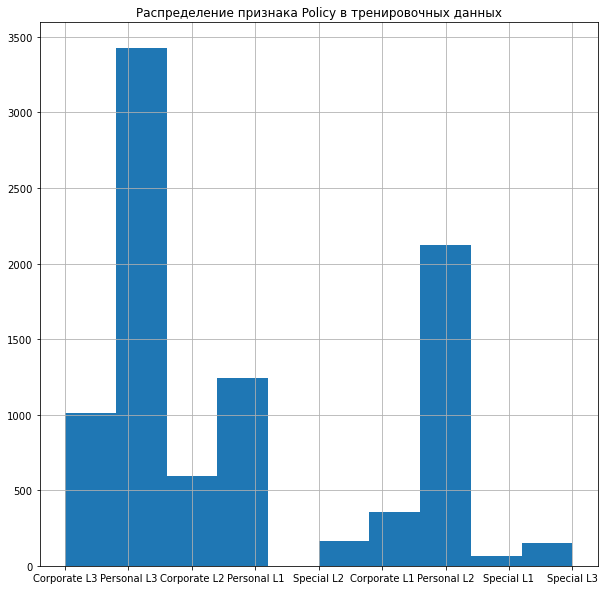

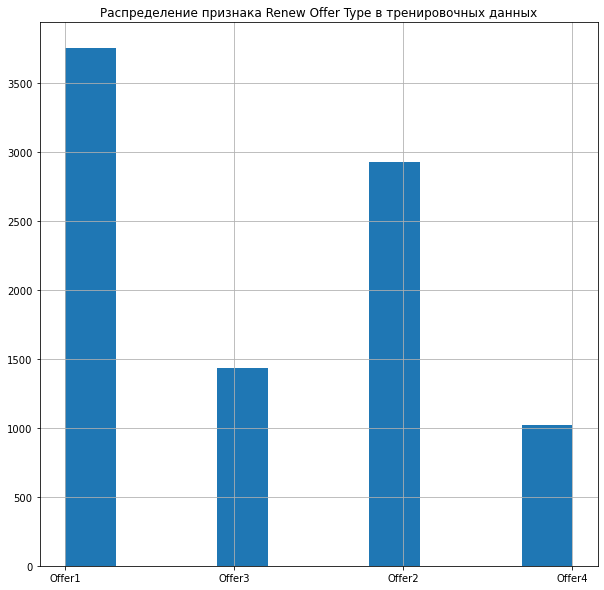

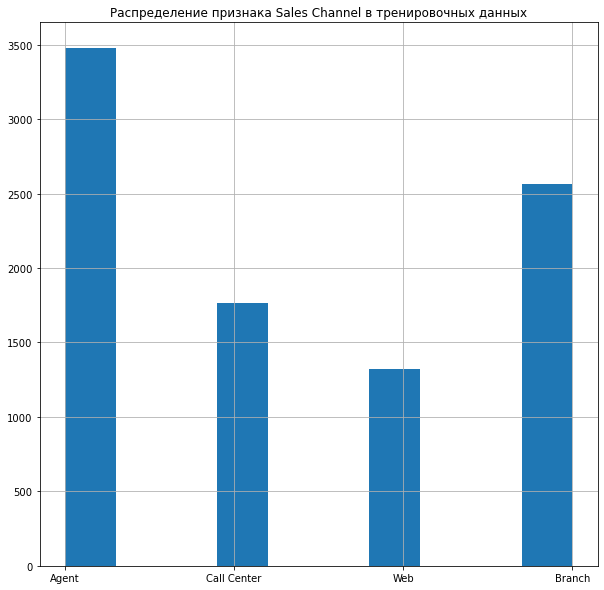

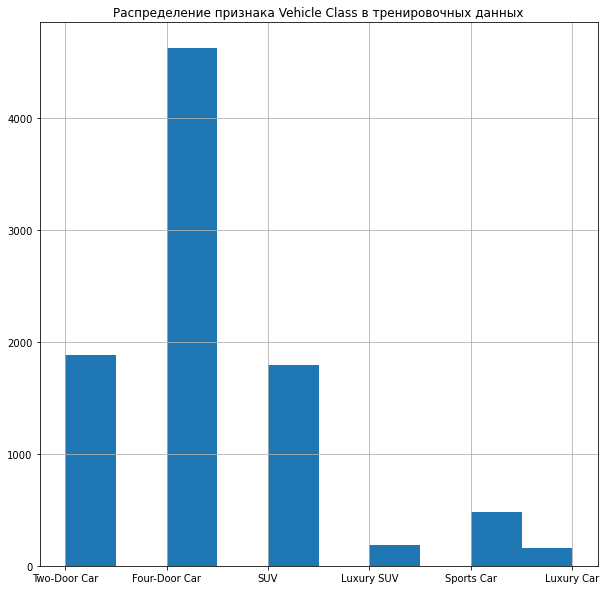

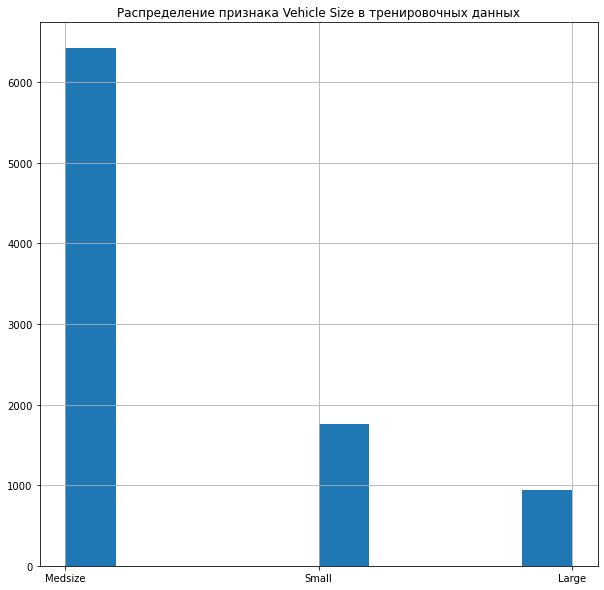

In [9]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    train_data[col].hist()

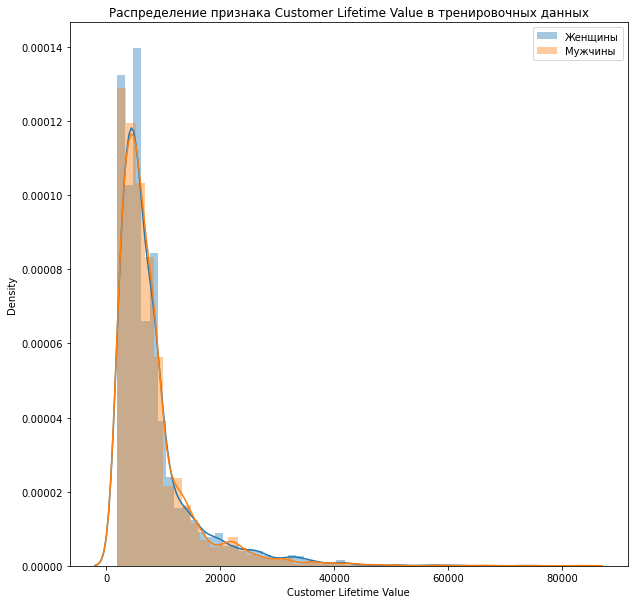

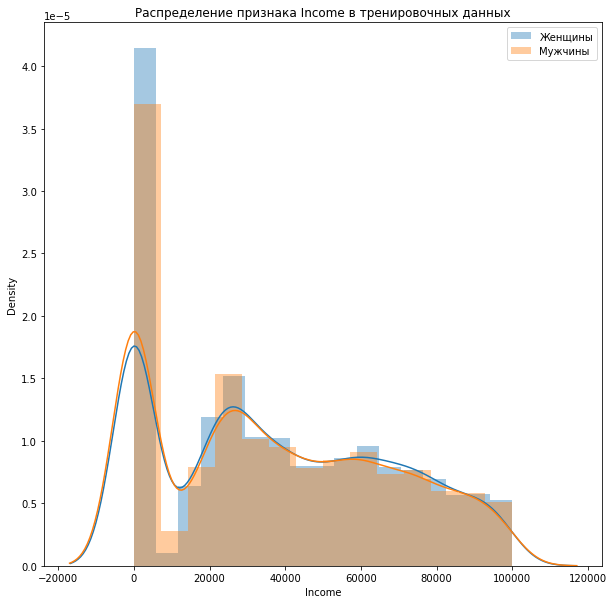

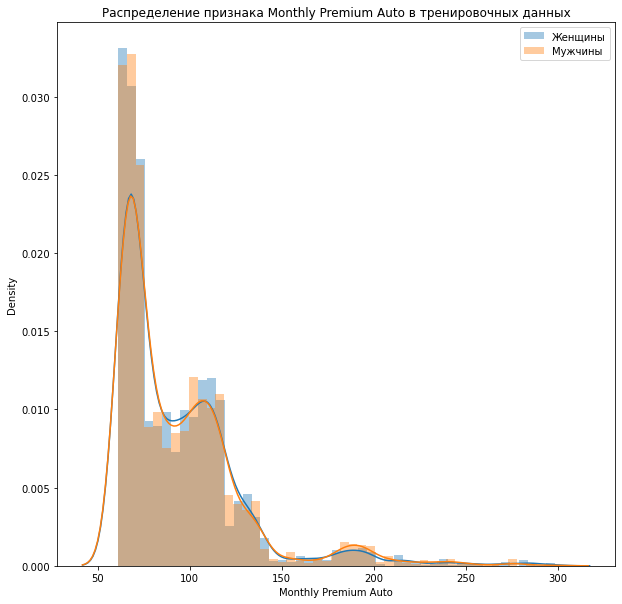

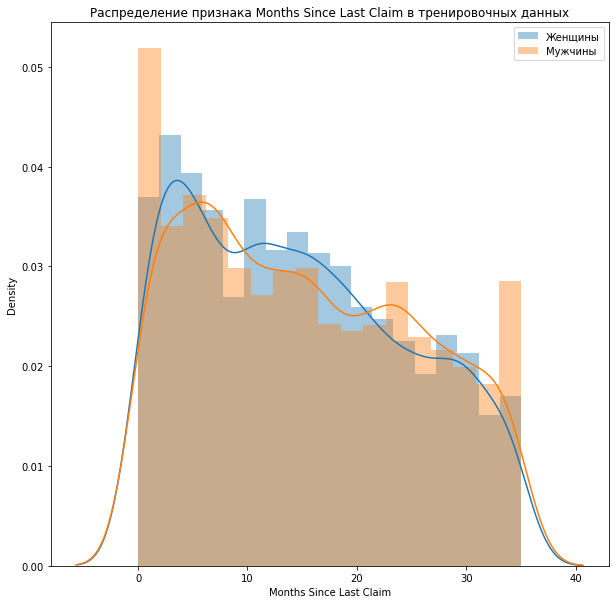

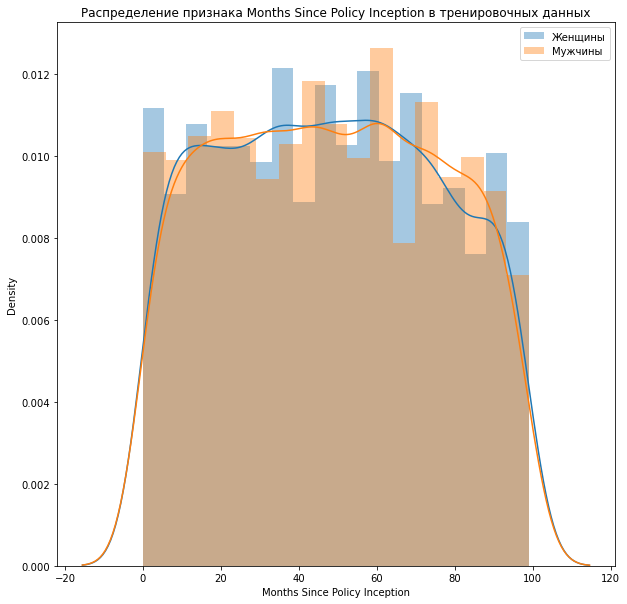

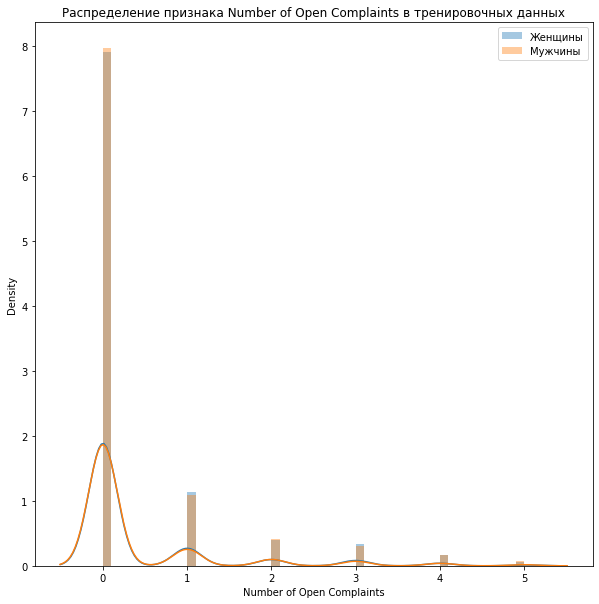

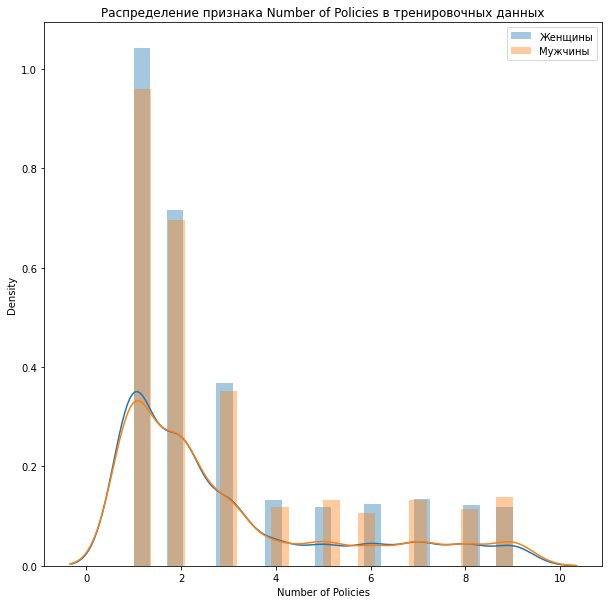

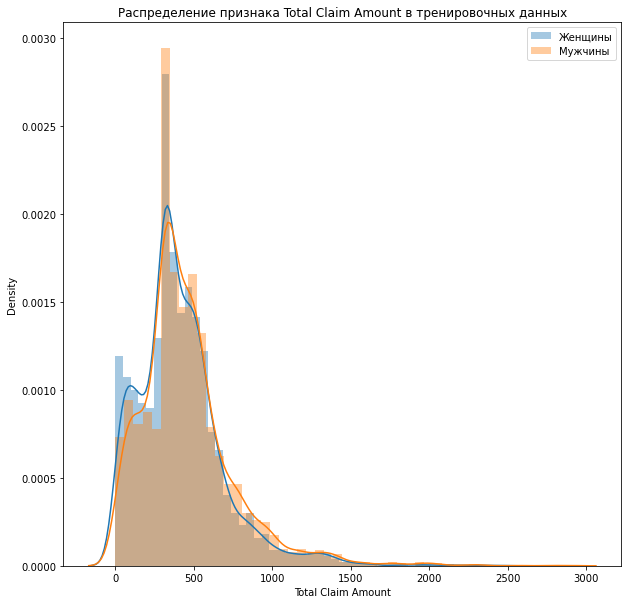

In [10]:
Gender_F = train_data[train_data['Gender'] == 'F']
Gender_M = train_data[train_data['Gender'] == 'M']


for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(Gender_F[col], label = 'Женщины')
    sns.distplot(Gender_M[col], label = 'Мужчины')   
    plt.legend()

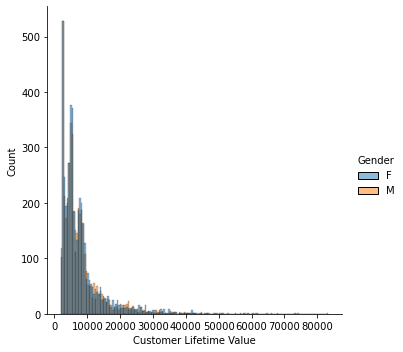

In [11]:
sns.displot(data=train_data, x='Customer Lifetime Value',hue='Gender')

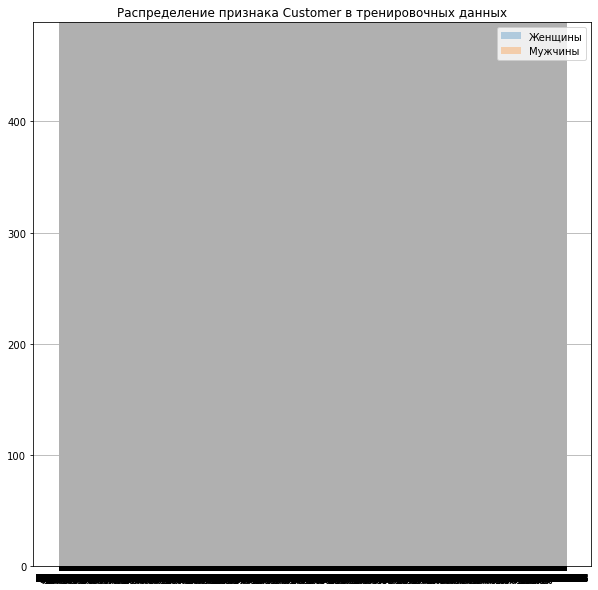

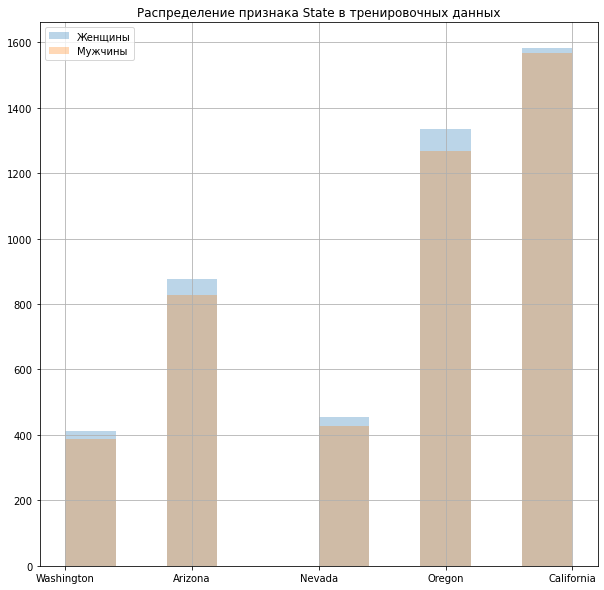

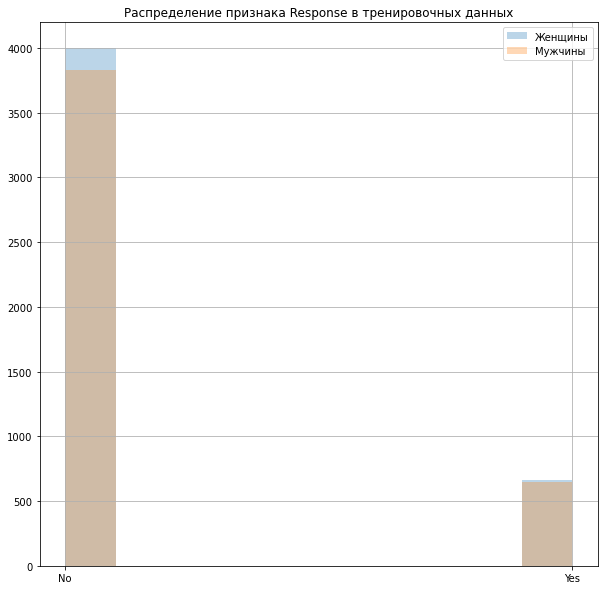

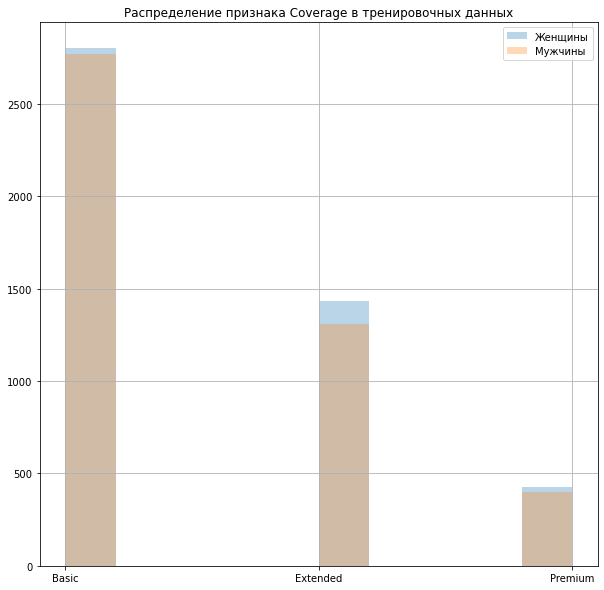

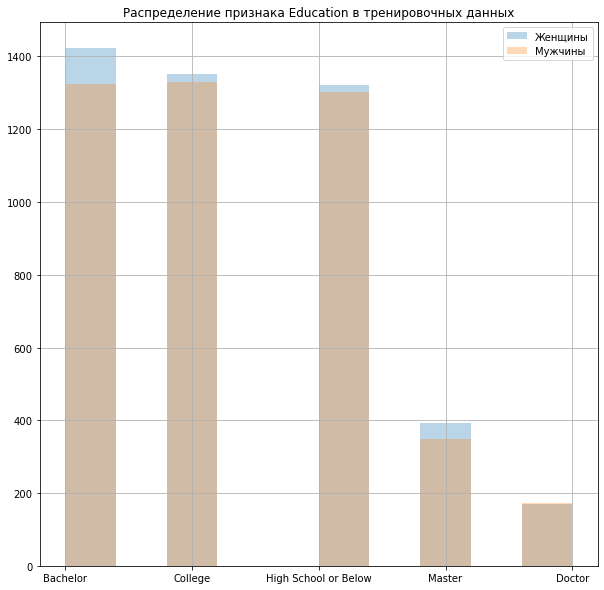

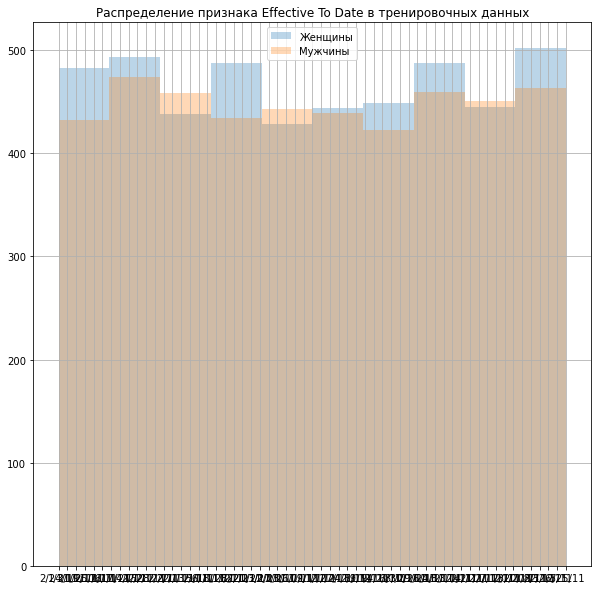

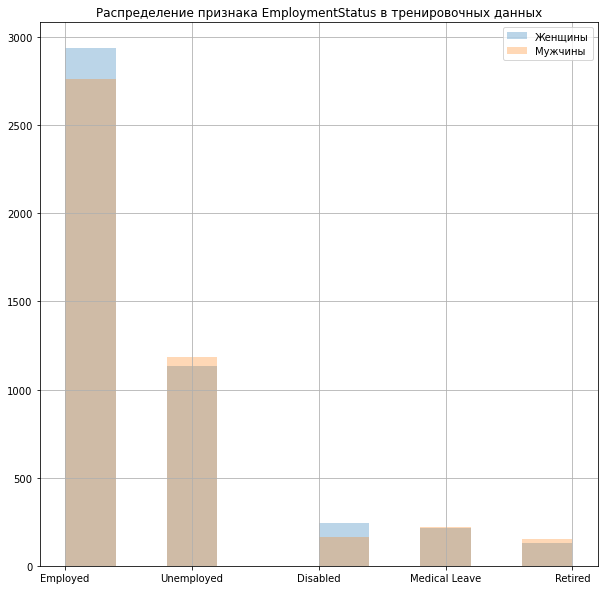

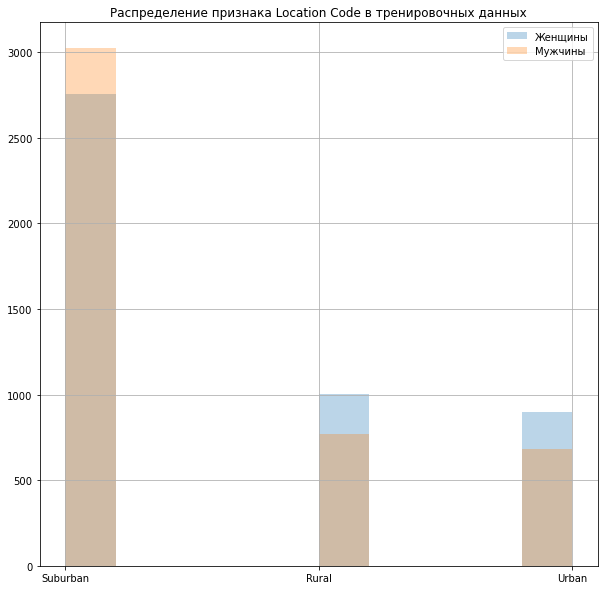

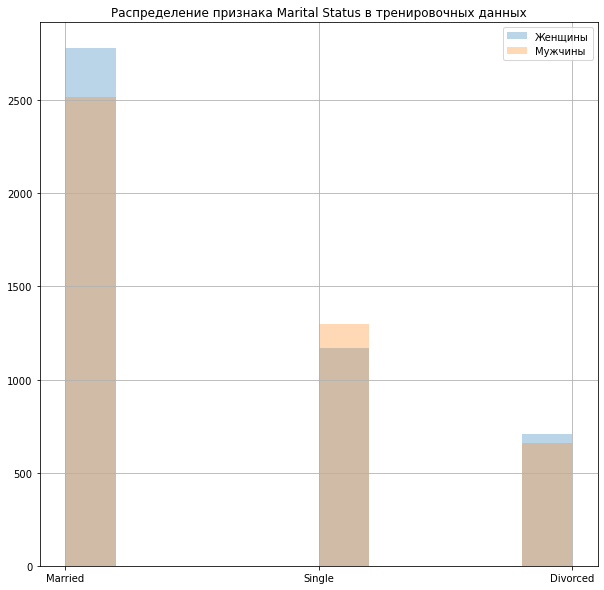

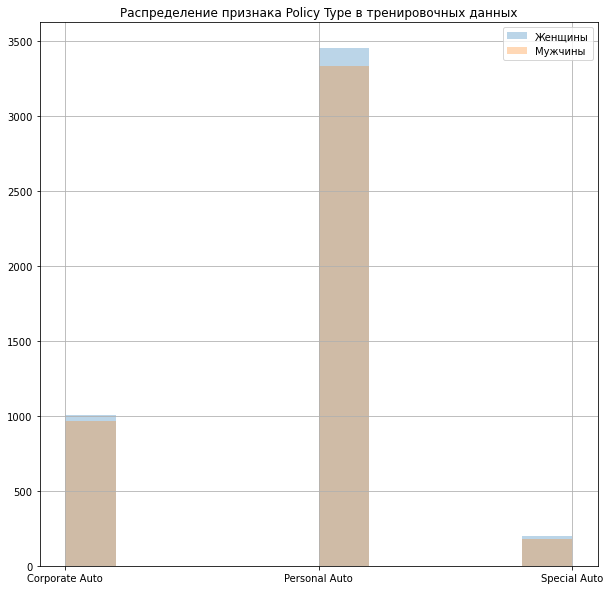

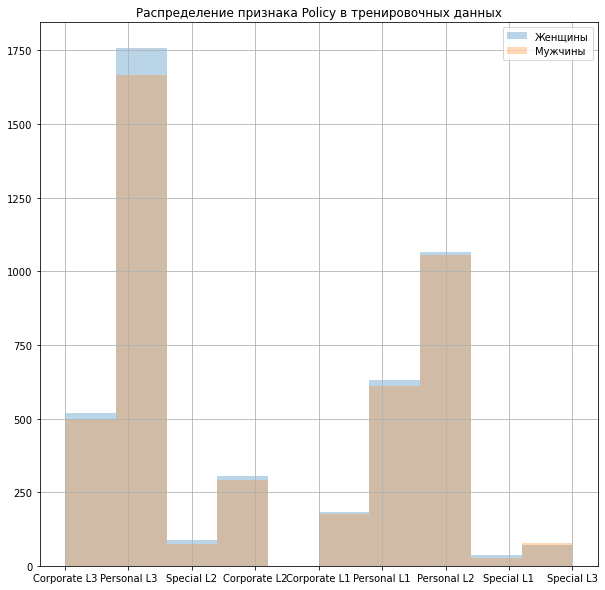

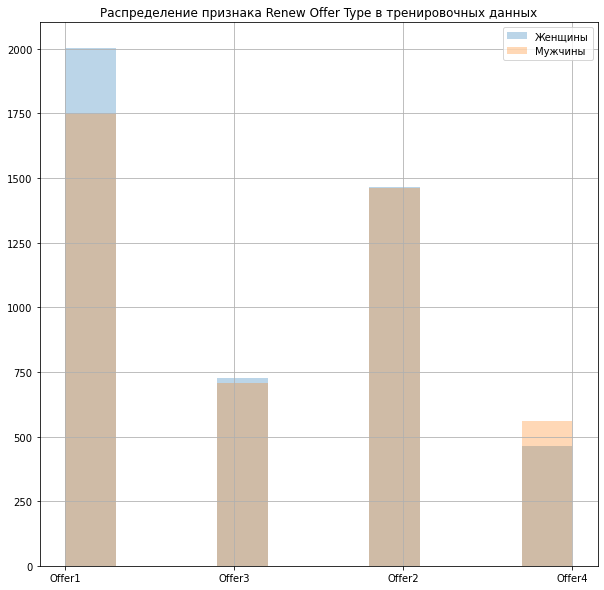

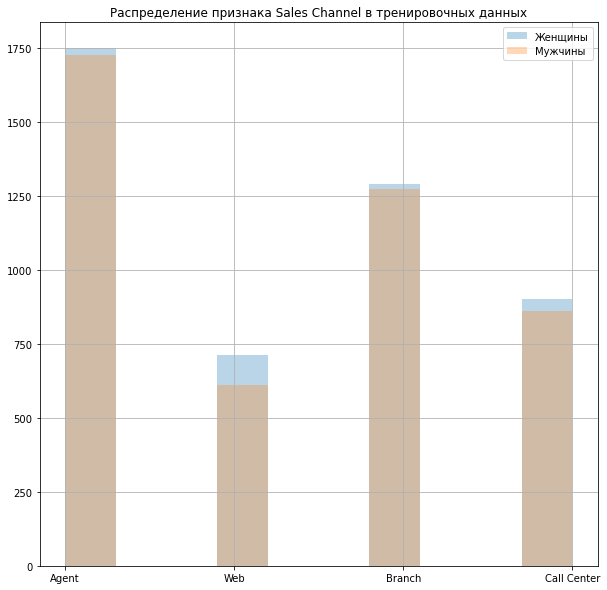

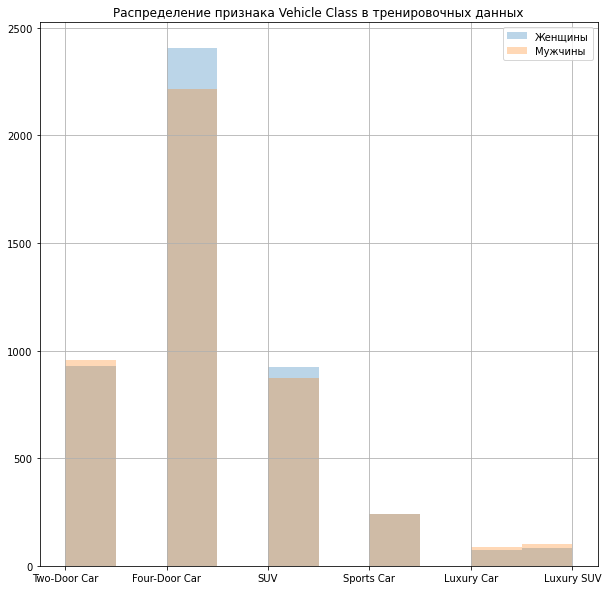

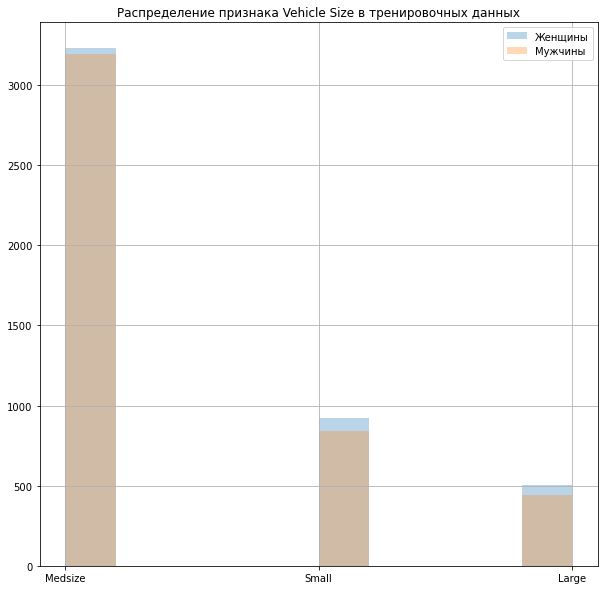

In [14]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    Gender_F[col].hist(label = 'Женщины', alpha = 0.3)
    Gender_M[col].hist(label = 'Мужчины', alpha = 0.3)   
    plt.legend()

In [ ]:
# По данным графикам, что распределение по половому признаку в выборке практически равномерно.

In [15]:
test_data = pd.read_csv('LTV.csv')
print (test_data.shape)

(9134, 24)


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in str_cols:
    print(col)
    X[col] = le.fit_transform(X[col])
    test_data[col] = le.transform(test_data[col])

X.sample(10)


Customer
State
Response
Coverage
Education
Effective To Date
EmploymentStatus
Location Code
Marital Status
Policy Type
Policy
Renew Offer Type
Sales Channel
Vehicle Class
Vehicle Size


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
8740,7530,1,7685.652168,0,2,3,26,4,0,1,...,95,0,3,0,2,2,1,799.200000,0,0
1791,8208,3,3118.927949,0,1,1,54,1,88782,2,...,38,0,1,1,5,3,3,357.757645,0,0
55,6622,0,7164.395543,0,1,1,54,1,46623,1,...,53,0,3,0,2,2,2,436.800000,0,2
7339,8333,1,6712.294021,0,1,0,53,1,44891,0,...,75,0,6,1,5,2,2,74.803791,0,1
5706,4519,1,4691.043597,0,0,0,6,4,0,1,...,11,1,3,1,5,1,0,407.218947,0,1
2571,3954,1,5580.818466,0,0,0,54,1,57883,1,...,0,0,9,1,5,2,0,431.847824,0,2
4838,8165,2,20186.346930,0,1,0,34,4,0,1,...,22,0,2,0,2,0,1,379.200000,0,1
6998,5441,3,12168.644050,0,0,4,45,4,0,0,...,96,0,2,2,7,0,0,30.989755,4,1
4874,753,3,2471.077732,0,0,3,7,1,53074,2,...,86,0,1,1,4,0,0,268.773368,5,1
1535,4533,1,7706.036295,0,0,2,35,1,48019,0,...,94,0,2,0,2,0,0,137.665031,0,1


In [17]:
y = le.fit_transform(y)
y[:10]

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0])

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

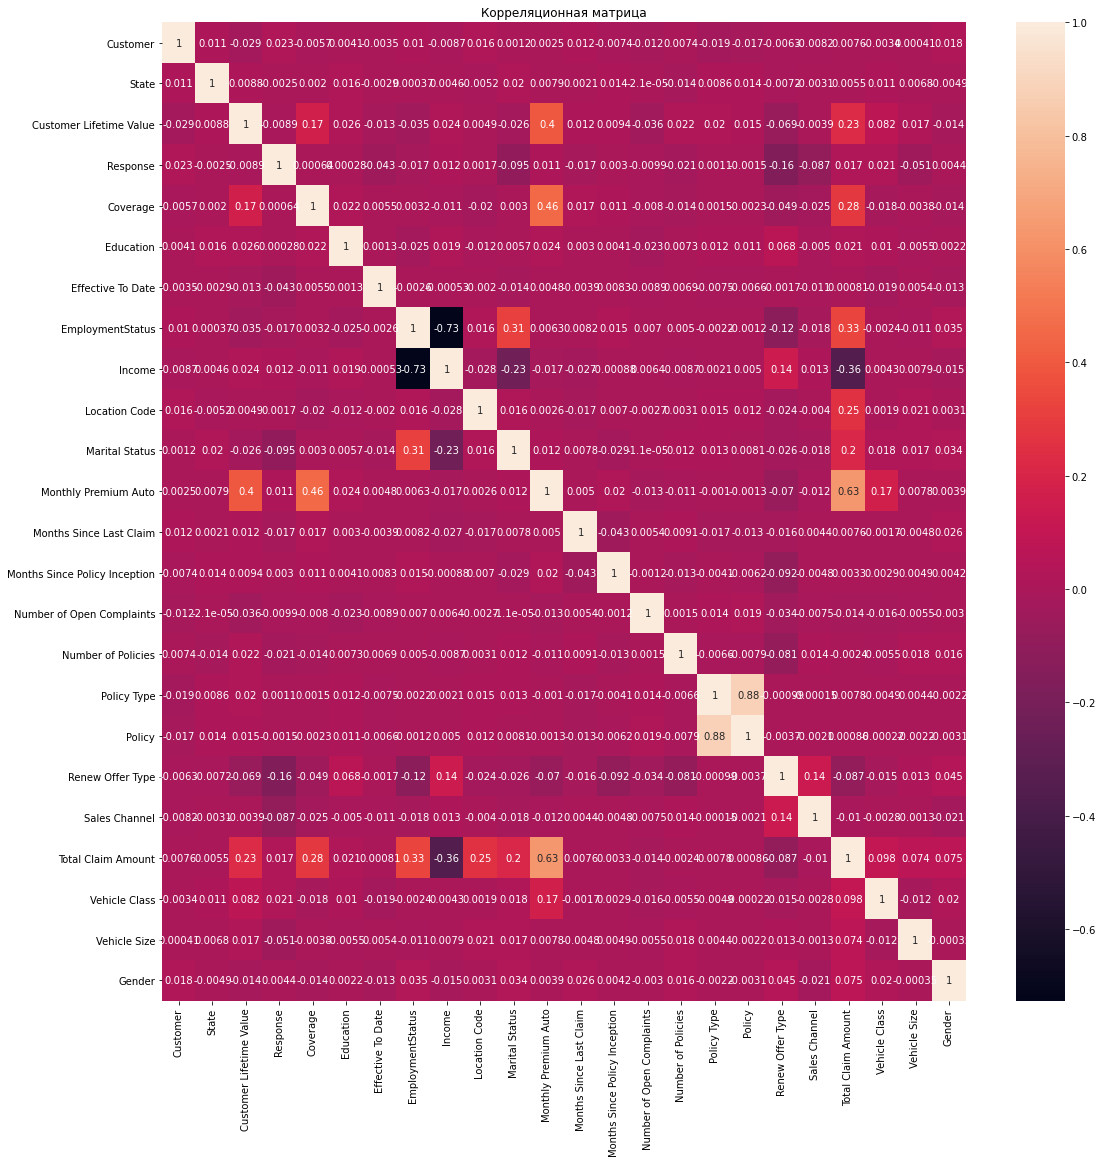

In [19]:
train_data_trasformed = pd.DataFrame(X_sc, columns = X.columns)
train_data_trasformed['Gender'] = y
corr_m = train_data_trasformed.corr()
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

In [24]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

log_reg = LogisticRegression(C = 0.8, random_state = 50, max_iter = 500)
cv_log_reg = cross_validate(log_reg, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Логистическая регрессия:", cv_log_reg['test_score'].mean())

Логистическая регрессия: 0.562900443465171


In [26]:
cv_log_reg['test_score']

array([0.5733426 , 0.53960246, 0.57201669, 0.55000983, 0.57953063])

In [25]:
# Решающее дерево
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state = 50)
cv_dec_tree = cross_validate(dec_tree, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Решающее дерево:", cv_dec_tree['test_score'].mean())

Решающее дерево: 0.563303164876625


In [27]:
# Случайный лес
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier(random_state = 50)
cv_ran_for = cross_validate(ran_for, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Случайный лес:", cv_ran_for['test_score'].mean())

Случайный лес: 0.6665731289100412


In [28]:
log_reg.fit(X_sc, y)
print("Коэффициент - Линейная регрессия:", log_reg.coef_)

Коэффициент - Линейная регрессия: [[ 0.03529688 -0.01134334 -0.02475907  0.01815147 -0.03439029 -0.00733088
  -0.0253158   0.05005041  0.10232876 -0.06793534  0.01997145 -0.15899746
   0.05490644  0.02555928 -0.00220872  0.04313296  0.00044445 -0.00460881
   0.11358536 -0.05649063  0.3095804   0.03908635 -0.02208191]]


In [29]:
dec_tree.fit(X, y)
print("Решающее дерево", dec_tree.feature_importances_)

Решающее дерево [0.10342819 0.02693374 0.11778582 0.01882215 0.00824865 0.02741671
 0.072985   0.00772347 0.07788828 0.00412732 0.01801783 0.07332336
 0.09185068 0.0890232  0.02190965 0.02678302 0.00567053 0.03176407
 0.02545613 0.0212684  0.09610062 0.02358276 0.00989042]


In [30]:
X.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
import shap

shap.initjs()
ran_for.fit(X, y)

explainer = shap.TreeExplainer(ran_for)
shap_values = explainer.shap_values(X)

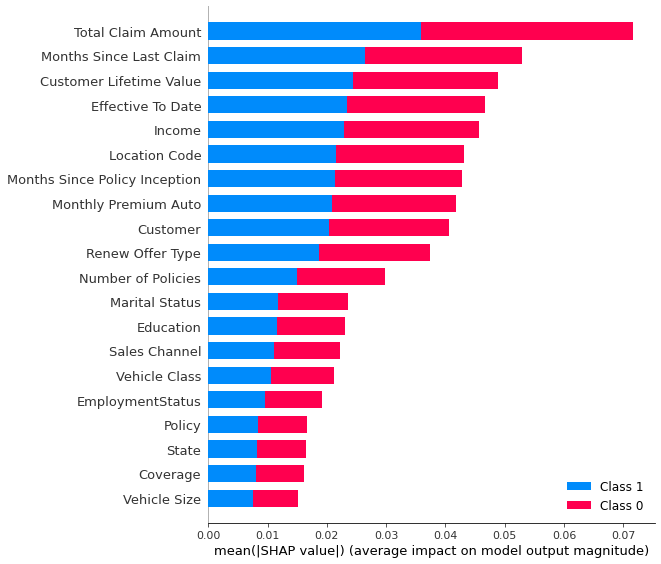

In [32]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [ ]:
# Из моделей мой выбор падает на РандомФорест, потому что уровень его эффективности выше чем у Логистической регрессии и Решающего Дерева.
# Наибольшее влияние на LTV имеет показатель Monthly Premium Auto .